In [1]:
import rebound
import reboundx
import numpy as np
from rebound import InterruptiblePool
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def getstr(dt):
    return "{:.0e}".format(dt)

def simulation(par):
    run, mp, tau_inc, inc0, integrator, dt = par
    sim = rebound.Simulation()
    sim.integrator = "ias15"
    sim.dt = -dt
    sim.add(m=1.)
    
    np.random.seed(run)
    inc0 = inc0 + 1.e-3*inc0*np.random.rand() 
    sim.add(m=mp,a=1.,inc=inc0)
    sim.add(m=mp,a=3.,inc=0.)
    sim.move_to_com() # Moves to the center of momentum frame  
    
    sim.step()
    E0 = sim.calculate_energy()
    sim.dt = dt
    rebx = reboundx.Extras(sim)
    rebx.add_modify_orbits_direct()
    
    tau_incs = rebx.modify_orbits_direct.tau_inc
    tau_incs[1] = tau_inc    
    
    sim.step()
    Ef = sim.calculate_energy()

    err = np.fabs(Ef - E0)/np.fabs(E0)
    return [err, mp, tau_inc, getstr(dt)]

In [3]:
simulation((1,1.e-3,-1000,0.1,"ias15",0.0001))

[6.5030463445909069e-16, 0.001, -1000, '1e-04']

In [4]:
def plotMpScaling(integrator, ax):
    Nruns = 5
    Nmp = 100
    dt = .1
    inc0 = 0.1
    tau_inc = -1000
    mps = np.logspace(-16,-1,Nmp)
    params = [(run, mp, tau_inc, inc0, integrator, dt) for run in range(Nruns) for mp in mps]
    pool = InterruptiblePool()
    res = pool.map(simulation, params)

    errs = [x[0] for x in res]
    mps = [x[1] for x in res]

    ax.scatter(mps, errs, alpha=0.2)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim([1.e-10, 0.1])
    ax.set_ylim([1.e-16, 1.e-7])
    ax.set_aspect('equal')
    ax.set_xlabel(r'$M_p/M_\star$', fontsize=24)
    ax.set_ylabel(r'Relative energy error', fontsize=24)
    ax.tick_params(labelsize=16)

In [5]:
def plotTauScaling(integrator, ax):
    Nruns = 5
    Ntau = 100
    mp=1e-3
    dt = .1
    inc0 = 0.1
    tau_incs = np.logspace(0,5,Ntau)
    params = [(run, mp, -tau_inc, inc0, integrator, dt) for run in range(Nruns) for tau_inc in tau_incs]
    pool = InterruptiblePool()
    res = pool.map(simulation, params)

    errs = [x[0] for x in res]
    tau_incs = [-x[2] for x in res]

    ax.scatter(tau_incs, errs, alpha=0.2)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim([1, 1e5])
    ax.set_ylim([1.e-16, 1.e-4])
    ax.set_aspect('equal')
    ax.set_xlabel(r'$\tau_{inc}/P_{orb}$', fontsize=24)
    ax.set_ylabel(r'Relative energy error', fontsize=24)
    ax.tick_params(labelsize=12)

In [6]:
def getstr(dt):
    return "{:.0e}".format(dt)

def simdt(par):
    run, mp, tau_inc, inc0, integrator, dt = par
    sim = rebound.Simulation()
    sim.integrator = "None"
    
    sim.add(m=1.)
    np.random.seed(run)
    inc0 = inc0 + 1.e-3*inc0*np.random.rand() 
    sim.add(m=mp,a=1.,inc=inc0)
    sim.add(m=mp,a=3.,inc=0.)
    sim.move_to_com() # Moves to the center of momentum frame  
    
    E0 = sim.calculate_energy()
    sim.dt = dt
    rebx = reboundx.Extras(sim)
    rebx.add_modify_orbits_direct()
    
    tau_incs = rebx.modify_orbits_direct.tau_inc
    tau_incs[1] = tau_inc    
    
    sim.step()
    Ef = sim.calculate_energy()

    err = np.fabs(Ef - E0)/np.fabs(E0)
    return [err, mp, tau_inc, dt]

In [7]:
def plotDTScaling(integrator, ax):
    Nruns = 5
    Ndt = 100
    mp=1e-3
    inc0 = 0.1
    tau_inc = -1000
    dts = np.logspace(-16,-1,Ndt)
    params = [(run, mp, -tau_inc, inc0, integrator, dt) for run in range(Nruns) for dt in dts]
    pool = InterruptiblePool()
    res = pool.map(simdt, params)

    errs = [x[0] for x in res]
    dts = [x[3] for x in res]

    ax.scatter(dts, errs, alpha=0.2)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim([1.e-8, 1e-1])
    ax.set_ylim([1.e-16, 1.e-9])
    ax.set_aspect('equal')
    ax.set_xlabel(r'$dt/P_{orb}$', fontsize=24)
    ax.set_ylabel(r'Relative energy error', fontsize=24)
    ax.tick_params(labelsize=12)

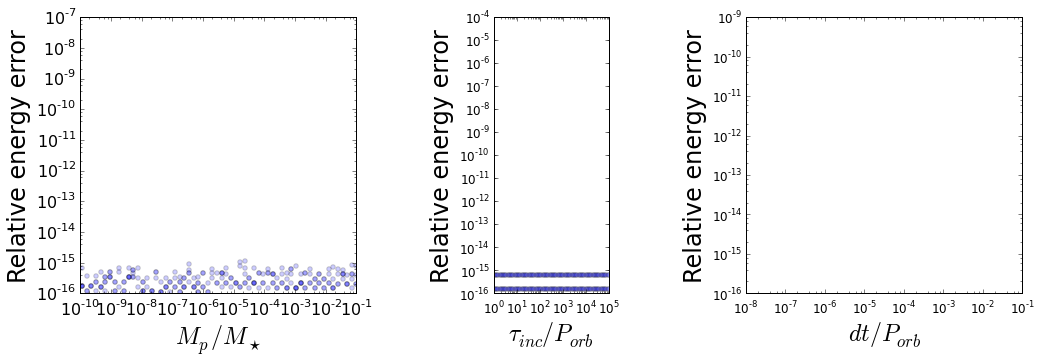

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1,ncols=3, figsize=(15,5))
plotMpScaling("ias15", ax1)
plotTauScaling("ias15", ax2)
plotDTScaling("ias15", ax3)
plt.tight_layout()

In [1]:
import rebound
import reboundx
import numpy as np
from rebound import InterruptiblePool
%matplotlib inline
import matplotlib.pyplot as plt
def simlong(par):
    run, mp, tau_inc, inc0, tmax, Nout = par
    sim = rebound.Simulation()
    sim.integrator = "ias15"
    sim.add(m=1.)
    
    np.random.seed(run)
    inc0 = inc0 + 1.e-3*inc0*np.random.rand() 
    sim.add(m=mp,a=1.,inc=inc0)
    sim.add(m=mp,a=2.,inc=0.2)
    sim.move_to_com() # Moves to the center of momentum frame  
    
    rebx = reboundx.Extras(sim)
    rebx.add_modify_orbits_direct()
    
    tau_incs = rebx.modify_orbits_direct.tau_inc
    tau_incs[1] = tau_inc    
    
    times = np.logspace(0,np.log10(tmax),Nout)
    E0 = sim.calculate_energy()
    r00 = sim.calculate_orbits()[0].r
    r10 = sim.calculate_orbits()[1].r
    Eerrs, Rerr1, Rerr2, inc1, inc2 = np.zeros(len(times)), np.zeros(len(times)), np.zeros(len(times)), np.zeros(len(times)), np.zeros(len(times))
    for i,time in enumerate(times):
        sim.integrate(time, exact_finish_time=0)
        E = sim.calculate_energy()
        o = sim.calculate_orbits()
        r = o[0].r
        inc = o[0].inc
        Eerrs[i] = np.fabs(E - E0)/np.fabs(E0)
        Rerr1[i] = np.fabs(r - r00)/np.fabs(r00)
        inc1[i] = inc
        r = o[1].r
        inc = o[1].inc
        Rerr2[i] = np.fabs(r - r10)/np.fabs(r10)
        inc2[i] = inc

    return [times, Eerrs, Rerr1, Rerr2, inc1, inc2, mp, tau_inc]

In [2]:
def plotsimlong(ax1,ax2,ax3, Nruns=1, Nout=1000, tmax=1e4, mp=1e-3, tau_inc=-1e3, inc0=0.1):
    params = [(run, mp, tau_inc, inc0, tmax, Nout) for run in range(Nruns)]
    pool = InterruptiblePool()
    res = pool.map(simlong, params)

    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    ax3.set_xscale('log')
    ax3.set_yscale('log')
    
    for run in res:
        times = run[0]
        Eerrs = run[1]
        Rerr1 = run[2]
        Rerr2 = run[3]
        inc1 = run[4]
        inc2 = run[5]
        ax1.plot(times, Eerrs, alpha=1./Nruns)
        ax2.plot(times, Rerr1, alpha=1./Nruns)
        ax2.plot(times, Rerr2, alpha=1./Nruns)
        ax3.plot(times, inc1, alpha=1./Nruns)
        ax3.plot(times, inc2, alpha=1./Nruns)
        
    #ax1.set_ylim([1.e-16, 1.e-1])
    #ax2.set_ylim([1.e-16, 1.e-1])
    #ax3.set_ylim([1.e-16, 1.e-1])
    #ax.set_aspect('equal')
    ax1.set_xlabel(r'Time', fontsize=24)
    ax2.set_xlabel(r'Time', fontsize=24)
    ax3.set_xlabel(r'Time', fontsize=24)
    ax1.set_ylabel(r'Relative energy error', fontsize=24)
    ax2.set_ylabel(r'Orbital radius errors', fontsize=24)
    ax3.set_ylabel(r'Orbital inclinations', fontsize=24)
    #ax.tick_params(labelsize=12)

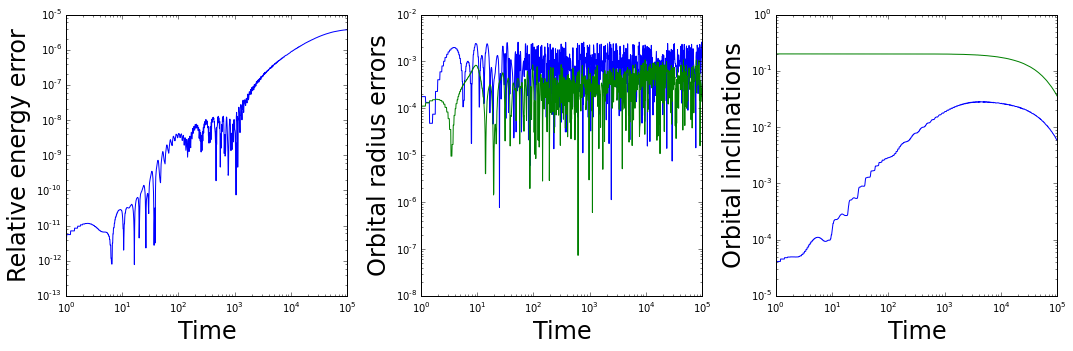

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1,ncols=3, figsize=(15,5))
plotsimlong(ax1,ax2, ax3, mp=1e-3, inc0 = 1.e-6, tau_inc=-1e3, tmax=1e5)
plt.tight_layout()